# When Model Meets Data

There are three major components of a machine learning system: data, models, and learning. The main question of machine learning is "What do we mean by good models?". The word model has many subtleties.  It is also not entirely obvious how to objectively define the word “good”. One of the guiding principles of machine learning is that good models should perform well on unseen data. This requires us to define some performance metrics, such as accuracy or distance from ground truth, as well as figuring out ways to do well under these performance metrics.

## Data as Vectors

We assume that our data can be read by a computer, and represented adequately in a numerical format. Data is assumed to be tabular, where we think of each row of the table as representing a particular instance or example, and each column to be a particular feature. Data can come in many shapes and forms not just tabular such as images, genomic etc...

Text data is typically converted to numberical e.g. male = 1 and female = -1. Even numerical data that could potentially be directly read into a machine learning algorithm should be carefully considered for units, scaling, and constraints. Without additional information, one should shift and scale all columns of the dataset such that they have an empirical mean of 0 and an empirical variance of 1.

- $N$: Number of examples in the dataset
- $x_n$: The nth example in the dataset
- $D$: Numer of featues in the dataset

Recall that data is represented as vectors, which means that each example (each data point) is a $D$-dimensional vector.

Let us consider the problem of predicting annual salary from age. This is called a supervised learning problem where we have a label $y_n$ (the salary) associated with each example $x_n$ (the age).  The label $y_n$ has various other names, including target, response variable, and annotation. A dataset is written as a set of example label pairs: $\{ (x_1, y_1), \cdots, (x_n, y_n), \cdots, (x_N, y_N) \}$

Representing data as vectors xn allows us to use concepts from linear algebra. In many machine learning algorithms, we need to additionally be able to compare two vectors. Computing the similarity or distance between two examples allows us to formalize the intuition that examples with similar features should have similar labels. The comparison of two vectors requires that we construct a geometry (notebook 3) and allows us to optimize the resulting learning problem using techniques

Since we have vector representations of data, we can manipulate data to find potentially better representations of it. We will discuss finding good representations in two ways: finding lower-dimensional approximations of the original feature vector, and using nonlinear higher-dimensional combinations of the original feature vector. An example of finding a low-dimensional approximation of the original data space by finding the principal components. Finding principal components is closely related to concepts of eigenvalue and singular value decomposition. For the high-dimensional representation, we will see an explicit feature map $\phi(.)$ that allows us to represent inputs $x_n$ using a higher-dimensional representation $\phi(x_n)$. The main motivation for higher-dimensional representations is that we can construct new features as non-linear combinations of the original features, which in turn may make the learning problem easier.

### Models as Functions

Once we have data in an appropriate vector representation, we can get to the business of constructing a predictive function (known as a predictor). A predictor is a function that, when given a particular input example (in our case, a vector of features), produces an output. For now, consider the output to be a single number, i.e., a real-valued scalar output. This can be written as:

\begin{equation}
f: \mathbb{R}^D \rightarrow \mathbb{R}
\end{equation}

where the input vector $x$ is $D$-dimensional (has $D$ features), and the function $f$ then applied to it (written as $f(x)$) returns a real number.

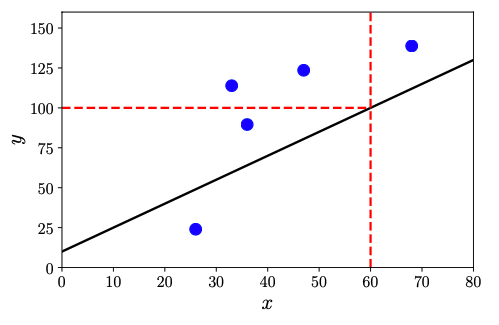

_Example function (black solid diagonal line) and its prediction at $x = 60$, i.e., $f(60) = 100$_

The above figure illustrates a possible function that can be used to compute the value of the prediction for input values $x$.

### Models as Probability Distributions

We often consider data to be noisy observations of some true underlying effect, and hope that by applying machine learning we can identify the signal from the noise. This requires us to have a language for quantify- ing the effect of noise. We often would also like to have predictors that express some sort of uncertainty, e.g., to quantify the confidence we have about the value of the prediction for a particular test data point. Probability theory provides a language for quantifying uncertainty. The figure below illustrates the predictive uncertainty of the function as a Gaussian distribution.

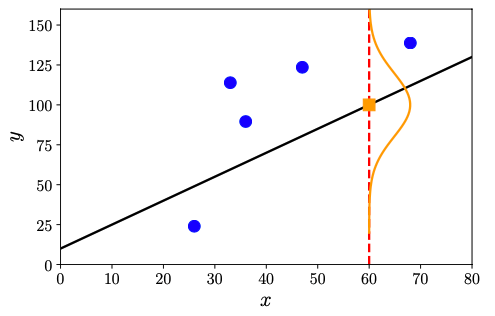

_Example function (black solid diagonal line) and its predictive uncertainty at $x = 60$ (drawn as a Gaussian)._

Instead of considering a predictor as a single function, we could con- sider predictors to be probabilistic models, i.e., models describing the distribution of possible functions

### Learning is Finding Parameters

The goal of learning is to find a model and its corresponding parameters such that the resulting predictor will perform well on unseen data. There are conceptually three distinct algorithmic phases when discussing machine learning algorithms:

1. Prediction or inference
2. Training or parameter estimation
3. Hyperparameter tuning or model selection

The prediction phase is when we use a trained predictor on previously un- seen test data. In other words, the parameters and model choice is already fixed and the predictor is applied to new vectors representing new input data points.

The training or parameter estimation phase is when we adjust our predictive model based on training data. We would like to find good predic- tors given training data, and there are two main strategies for doing so: finding the best predictor based on some measure of quality (sometimes called finding a point estimate), or using Bayesian inference. Finding a point estimate can be applied to both types of predictors, but Bayesian inference requires probabilistic models.

We use numerical methods to find good parameters that "fit" the data, and most training methods can be thought of as hill-climbing approaches to find the maximum of an objective, for example the maximum of a likelihood. To apply hill-climbing approaches we use the gradients.

We are interested in learning a model based on data such that it performs well on future data. It is not enough for the model to only fit the training data well, the predictor needs to per- form well on unseen data. We simulate the behavior of our predictor on future unseen data using cross-validation. As we will see in this chapter, to achieve the goal of performing well on unseen data, we will need to balance between fitting well on training data and finding "simple" explanations of the phenomenon. This trade-off is achieved using regularization or by adding a prior. We often need to make high-level modeling decisions about the structure of the predictor, such as the number of components to use or the class of probability distributions to consider. The choice of the number of components is an example of a hyperparameter, and this choice can affect the performance of the model significantly. The problem of choosing among different models is called model selection. For non-probabilistic models, model selection is often done using nested cross-validation, which is described in Section. We also use model selection to choose hyperparameters of our model.

## Empirical Risk Minimisation

### Hypothesis Class of Functions

Assume we are given $N$ examples $x_n \in \mathbb{R}^D$ and corresponding scalar labels $y_n \in \mathbb{R}$. We consider the supervised learning setting, where we obtain pairs $(x_1, y_1), \cdots , (x_N , y_N )$. Given this data, we would like to estimate a predictor $f(·,\theta):\mathbb{R}^D \rightarrow \mathbb{R}$, parametrized by $\theta$.

Ordinary least-squares from regression can be used to illustrate empirical risk minimization. When the label $y_n$ is real-valued, a popular choice
of function class for predictors is the set of affine functions. The predictor linear function:

\begin{equation}
f(x_n, \theta) = \theta^{\top}x_n
\end{equation}

This linear predictor is equivalent to the affine mode

\begin{equation}
f(x_n, \theta) = \theta_0 \sum^D_{d=1} \theta_d x_n^{(d)}
\end{equation}

The predictor takes the vector of features representing a single example xn as input and produces a real-valued output, i.e., $f : \mathbb{R}^{D+1} \rightarrow \mathbb{R}$

Given the class of functions, we want to search for a good predictor. We now move on to the second ingredient of empirical risk minimisation: how to measure how well the predictor fits the training data.

### Loss Function for Training

Consider the label $y_n$ for a particular example; and the corresponding prediction $\hat{y}_n$ that we make based on $x_n$. To define what it means to fit the data well, we need to specify a loss function $\ell(y_n , \hat{y}_n)$ that takes the ground truth label and the prediction as input and produces a non-negative number (referred to as the loss) representing how much error we have made on this particular prediction. Our goal for finding a good parameter vector $\theta^∗$ is to minimize the average loss on the set of N training examples.

One assumption that is commonly made in machine learning is that the set of examples $(x_1 , y_1 ), \cdots , (x_N , y_N)$ is independent and identically distributed. The word independent means that two data points $(x_i , y_i )$ and $(x_j , y_j)$ do not statistically depend on each other, meaning that the empirical mean is a good estimate of the population mean. This implies that we can use the empirical mean of the loss on the training data. For a given training set $\{(x_1, y_1), \cdots , (x_N , y_N )\}$, we introduce the notation of an example matrix $X := [x_1, \cdots, x_n]^{\top} \in \mathbb{R}^{N \times D}$ and a label vector $y := [y_1, \cdots, y_N]^{\top} \in \mathbb{R}^N$. Using this matrix notation the average loss is given by

\begin{equation}
R_{emp}(f, X, y) = \frac{1}{n} \sum^N_{n=1} \ell(y_n, \hat{y}_n)
\end{equation}

where $\hat{y}_n = f(x_n, \theta)$. The above equation is called the emperical risk and depends on three arguments, the predictor $f$ and the data $X, y$. This general strategy for learning is called empirical risk minimization.

**Example Least-Squares Loss**

Continuing the example of least-squares regression, we specify that we measure the cost of making an error during training using the squared loss: $\ell(y_n, \hat{y}_n) = (y_n - \hat{y}_n)^2$. We wish to minimize the empirical risk which is the average of the losses over the data:

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \sum^N_{n=1} (y_n - f(x_n, \theta))^2
\end{equation}

where we substituted the predictor $\hat{y} = f(x_n, \theta)$. By using our choice of
a linear predictor $f(x_n, \theta) = \theta^{\top}x_n$, we obtain the optimization problem

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \sum^N_{n=1} (y_n - \theta^{\top}x_n)^2
\end{equation}

This equation can be equivalently expressed in matrix form

\begin{equation}
\underset{\theta \in \mathbb{R}^D}{min} \frac{1}{N} \left\| y - X \theta \right\|^2
\end{equation}

This is known as the least-squares problem. There exists a closed-form analytic solution for this by solving the normal equations

We are not interested in a predictor that only performs well on the training data. Instead, we seek a predictor that performs well (has low risk) on unseen test data. More formally, we are interested in finding a predictor $f$ (with parameters fixed) that minimizes the expected risk

\begin{equation}
R_{true}(f) = \mathbb{E}_{x,y}[\ell (y, f(x))]
\end{equation}

where y is the label and $f(x)$ is the prediction based on the example $x$. The notation $R_{true}(f)$ indicates that this is the true risk if we had access to an infinite amount of data. The expectation is over the (infinite) set of all possible data and labels. There are two practical questions that arise from our desire to minimize expected risk, which we address in the following two sections:

- How should we change our training procedure to generalize well?
- How do we estimate expected risk from (finite) data?

Many machine learning tasks are specified with an associated performance measure, e.g., accuracy of prediction or root mean squared error. The performance measure could be more complex, be cost sensitive, and capture details about the particular application. In principle, the de- sign of the loss function for empirical risk minimization should correspond directly to the performance measure specified by the machine learning task. In practice, there is often a mismatch between the design of the loss function and the performance measure. This could be due to issues such as ease of implementation or efficiency of optimization.

### Regularisation to Reduce Overfitting

Regularisation is an addition to empirical risk minimization that allows it to generalize well (approximately minimizing expected risk). Recall that the aim of training a machine learning predictor is so that we can perform well on unseen data, i.e., the predictor generalises well. We simulate this unseen data by holding out a proportion of the whole dataset. This hold out set is referred to as the test set. Given a sufficiently rich class of functions for the predictor $f$, we can essentially memorise the training data to obtain zero empirical risk. While this is great to minimize the loss (and therefore the risk) on the training data, we would not expect the predictor to generalize well to unseen data. In practice, we have only a finite set of data, and hence we split our data into a training and a test set. The training set is used to fit the model, and the test set (not seen by the machine learning algorithm during training) is used to evaluate generalisation performance. It is important for the user to not cycle back to a new round of training after having observed the test set.

It turns out that empirical risk minimization can lead to overfitting, i.e., the predictor fits too closely to the training data and does not generalise well to new data. This general phenomenon of having very small average loss on the training set but large average loss on the test set tends to occur when we have little data and a complex hypothesis class. For a particular predictor $f$ (with parameters fixed), the phenomenon of overfitting occurs when the risk estimate from the training data $R_{emp}(f, X_{train}, y_{train})$ underestimages the expected risk $R_{true}(f)$. Since we estimate the expected risk $R_{true}(f)$ by using the empirical risk on the test set $R_{emp}(f, X_{test}, y_{test})$ if the test risk is much larger than the training risk, this is an indication of overfitting.

Therefore, we need to somehow bias the search for the minimiser of empirical risk by introducing a penalty term, which makes it harder for the optimiser to return an overly flexible predictor. In machine learning, the penalty term is referred to as regularization. Regularisation is a way to compromise between accurate solution of empirical risk minimisation and the size or complexity of the solution.

Regularization is an approach that discourages complex or extreme solutions to an optimization problem. The simplest regularization strategy is to replace the least-squares problem:

\begin{equation}
\underset{\theta}{min}\frac{1}{N} \left\| y - X \theta \right\|^2
\end{equation}

with a "regularised" problem by adding a penalty term involving only $\theta$

\begin{equation}
\underset{\theta}{min}\frac{1}{N} \left\| y - X \theta \right\|^2 + \lambda\left\| \theta \right\|^2
\end{equation}

The additional term $\left\| \theta \right\|^2$ is called the regulariser, and the parameter $\lambda$ is the regularisation parameter. The regularization parameter trades
off minimizing the loss on the training set and the magnitude of the parameters θ. It often happens that the magnitude of the parameter values becomes relatively large if we run into overfitting

The regularization term is sometimes called the penalty term, which biases the vector $\theta$ to be closer to the origin. The idea of regularization also appears in probabilistic models as the prior probability of the parameters.

### Cross-Validation to Assess the Generalization Performance

We mentioned in the previous section that we measure the generalisation error by estimating it by applying the predictor on test data. This data is also sometimes referred to as the validation set. The validation set is a subset of the available training data that we keep aside. A practical issue with this approach is that the amount of data is limited, and ideally we would use as much of the data available to train the model. This would require us to keep our validation set $V$ small, which then would lead to a noisy estimate (with high variance) of the predictive performance. One solution to these contradictory objectives (large training set, large validation set) is to use cross-validation. K-fold cross-validation effectively partitions the data into $K$ chunks, $K$ − 1 of which form the training set $R$, and the last chunk serves as the validation set $V$ (similar to the idea outlined previously). Cross-validation iterates through (ideally) all combinations of assignments of chunks to $R$ and $V$. This procedure is repeated for all $K$ choices for the validation set, and the performance of the model from the $K$ runs is averaged.

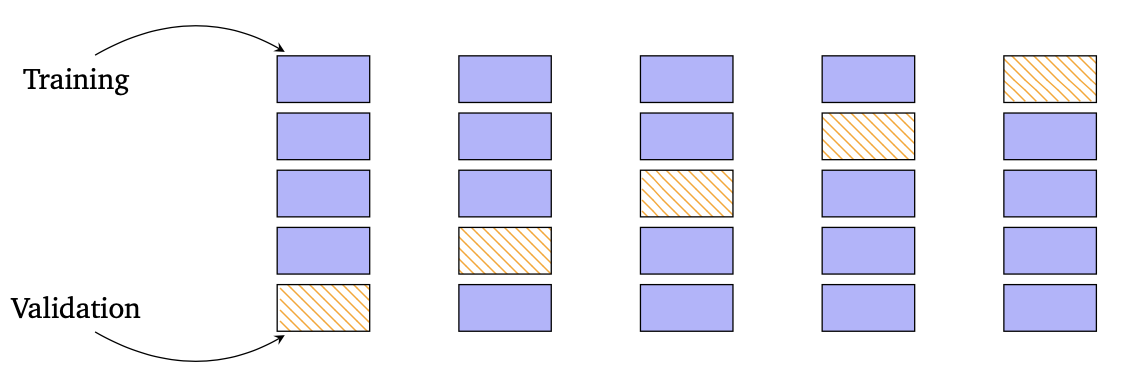

_K-fold cross-validation. The dataset is divided into $K$ = 5 chunks, $K$ − 1 of which serve as the training set (blue) and one as the validation set (orange hatch)_

Each partition $k$ the training data $R^{(k)}$ produces a predictor $f^{(k)}$, which is then applied to validation set $V^{(k)}$ to compute the empirical risk $R(f^{(k)}, V^{(k)})$. We cycle through all possible partitionings of validation and training sets and compute the average generalization error of the predictor. Cross-validation approximates the expected generalization error

\begin{equation}
\mathbb{E}_V[{R(f,V)}] \approx \frac{1}{K}\sum_{k=1}^KR(f^{(k)}, V^{(k)})
\end{equation}

where $R(f^{(k)}, V^{(k)})$ is the risk (e.g., RMSE) on the validation set $V^{(k)}$ for predictor $f^{(k)}$. A potential disadvantage of $K$-fold cross-validation is the computational cost of training the model $K$ times, which can be burdensome if the training cost is computationally expensive. In practice, it is often not sufficient to look at the direct parameters alone. For example, we need to explore multiple complexity parameters (e.g., multiple regularisation parameters), which may not be direct parameters of the model. Evaluating the quality of the model, depending on these hyperparameters, may result in a number of training runs that is exponential in the number of model parameters. One can use nested cross-validation to search for good hyperparameters.

However, cross-validation is an parallel problem, i.e., little effort is needed to separate the problem into a number of parallel tasks. Given sufficient computing resources, cross-validation does not require longer than a single performance assessment.

## Parameter Estimation

### Maximum Likelihood Estimation

The idea behind maximum likelihood estimation (MLE) is to define a function of the parameters that enables us to find a model that fits the data well. The estimation problem is focused on the likelihood function, or more precisely its negative logarithm. For data represented by a random variable $x$ and for a family of probability densities $p(x|\theta)$ parameterised by $\theta$, the negative log-likelihood is given by:

\begin{equation}
\mathcal{L}_x(\theta) = -log p(x|\theta)
\end{equation}

The notation $\mathcal{L}_x(\theta)$ emphasises the fact that the parameter $\theta$ is varying and the data $x$ is fixed. We very often drop the reference to $x$ when writing the negative log-likelihood, as it is really a function of $\theta$, and write it as $\mathcal{L}(\theta)$ when the random variable representing the uncertainty in the data is clear from the context.

Let us interpret what the probability density $p(x | \theta)$ is modeling for a fixed value of $\theta$. It is a distribution that models the uncertainty of the data. In other words, once we have chosen the type of function we want as a predictor, the likelihood provides the probability of observing data $x$. In a complementary view, if we consider the data to be fixed (because it has been observed), and we vary the parameters $\theta$, what does $\mathcal{L}(\theta)$ tell us? It tells us how likely a particular setting of $\theta$ is for the observations $x$. Based on this second view, the maximum likelihood estimator gives us the most likely parameter $\theta$ for the set of data.

We consider the supervised learning setting, where we obtain pairs $(x_1,y_1),\cdots,(x_N,y_N) \text{ with } x_n \in \mathbb{R}^D$ and labels $y_n \in \mathbb{R}$. We are interested in constructing a predictor that takes a feature vector $x_n$ as input and produces a prediction $y_n$ (or something close to it), i.e., given a vector $x_n$ we want the probability distribution of the label $y_n$. In other words, we specify the conditional probability distribution of the labels given the examples for the particular parameter setting $\theta$.

We assume that the set of examples $(x_1 , y_1 ), \cdots , (x_N , y_N )$ are independent and identically distributed (i.i.d.). In probability theory and statistics, a collection of random variables is independent and identically distributed if each random variable has the same probability distribution as the others and all are mutually independent.

It is often easier from an optimisation viewpoint to compute functions that can be decomposed into sums of simpler functions. Hence, in machine learning we often consider the negative log-likelihood:

\begin{equation}
\mathcal{L}(\theta) = -logp(\mathcal{Y} | \mathcal{X}, \theta) = - \sum_{n=1}^{N} logp(y_n | x_n, \theta)
\end{equation}

While it is temping to interpret the fact that $\theta$ is on the right of the conditioning in $p(y_n|x_n, \theta)$, and hence should be interpreted as observed and fixed, this interpretation is incorrect. The negative log-likelihood $\mathcal{L}(\theta)$ is a function of $\theta$. Therefore, to find a a good parameter vector $\theta$ that explains the data $(x_1, y_1), \cdots, (x_N, y_N)$ well, minimise the negative log-likelihood $\mathcal{L}(\theta)$ with respect to $\theta$.

The negative sign in above is a historical artifact that is due to the convention that we want to maximise likelihood, but numerical optimization literature tends to study minimization of functions.

### Maximum A Posteriori Estimation

If we have prior knowledge about the distribution of the parameters $\theta$, we can multiply an additional term to the likelihood. This additional term is a prior probability distribution on parameters $p(\theta)$. For a given prior, after observing some data $x$, how should we update the distribution of $\theta$? In other words, how should we represent the fact that we have more specific knowledge of $\theta$ after observing data $x$? Bayes’ theorem, as discussed earlier, gives us a principled tool to update our probability distributions of random variables. It allows us to compute a posterior distribution $p(\theta | x)$ (the more specific knowledge) on the parameters $\theta$ from general prior statements (prior distribution) $p(\theta)$ and the function $p(x | \theta)$ that links the parameters $\theta$ and the observed data $x$ (called the likelihood):

\begin{equation}
p(\theta| x) = \frac{p(x|\theta)p(\theta)}{p(x)}
\end{equation}

Recall that we are interested in finding the parameter $\theta$ that maximizes the posterior. Since the distribution $p(x)$ does not depend on $\theta$, we can ignore the value of the denominator for the optimisation and obtain:

\begin{equation}
p(\theta|x)  \propto p(x|\theta)p(\theta)
\end{equation}

The preceding proportion relation hides the density of the data $p(x)$, which may be difficult to estimate. Instead of estimating the minimum of the negative log-likelihood, we now estimate the minimum of the negative log-posterior, which is referred to as maximum a posteriori estimation (MAP estimation).

The idea of including prior knowledge about where good parameters lie is widespread in machine learning. An alternative view, is the idea of regularisation, which introduces an addi- tional term that biases the resulting parameters to be close to the origin. Maximum a posteriori estimation can be considered to bridge the non- probabilistic and probabilistic worlds as it explicitly acknowledges the need for a prior distribution but it still only produces a point estimate of the parameters.

The maximum likelihood estimate possesses the following properties:
- **Asymptotic consistency**: The MLE converges to the true value in the limit of infinitely many observations, plus a random error that is approximately normal
- The size of the samples necessary to achieve these properties can be quite large.
- The error’s variance decays in 1/N, where N is the number of data points.
- Especially, in the "small" data regime, maximum likelihood estimation can lead to overfitting.

The principle of maximum likelihood estimation (and maximum a posteriori estimation) uses probabilistic modeling to reason about the uncer- tainty in the data and model parameters. However, we have not yet taken probabilistic modeling to its full extent.  In this section, the resulting training procedure still produces a point estimate of the predictor, i.e., training returns one single set of parameter values that represent the best predictor.

### Model Fitting

We are given a dataset, and we are interested in fitting a parametrised model to the data. When we talk about "fitting", we typically mean optimising/learning model parameters so that they minimize some loss function, e.g., the negative log-likelihood.

The parametrization of the model defines a model class $\mathcal{M}_θ$ with which we can operate. For example, in a linear regression setting, we may define the relationship between inputs $x$ and (noise-free) observations $y$ to be $y = ax + b$, where $\theta := {a, b}$ are the model parameters. In this case, the model parameters $\theta$ describe the family of affine functions, i.e., straight lines with slope $a$, which are offset from $\theta$ by $b$. Assume the data comes from a model $\mathcal{M}^*$, which is unknown to us. For a given training dataset, we optimize $\theta$ so that $\mathcal{M}^_{\theta}$ is as close as possible to $\mathcal{M}^*$, where the "closeness" is defined by the objective function we optimise (e.g., squared loss on the training data). When we obtain the best possible parameters $\theta^*$, we distinguish three different cases: 
- (i) overfitting
- (ii) underfitting
- (iii) fitting well

Roughly speaking, overfitting refers to the situation where the parametrised model class is too rich to model the dataset. For instance, if the dataset was generated by a linear function, and we define $\mathcal{M}_θ$ to be the class of seventh-order polynomials, we could model not only linear functions, but also polynomials of degree two, three, etc. Models that over-fit typically have a large number of parameters. An observation we often make is that the overly flexible model class $\mathcal{M}_θ$ uses all its modeling power to reduce the training error. If the training data is noisy, it will therefore find some useful signal in the noise itself. This will cause enormous prob- lems when we predict away from the training data.

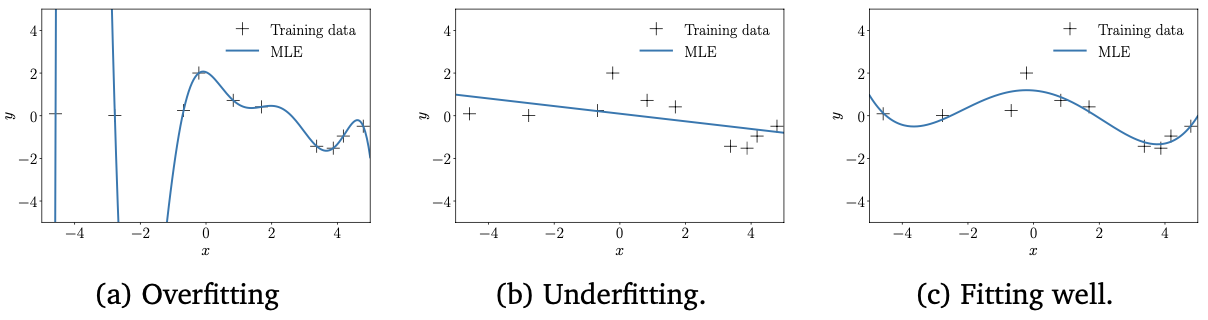

When we run into underfitting, we encounter the opposite problem where the model class $\mathcal{M}_θ$ is not rich enough. For example, if our dataset was generated by a sinusoidal function, but $\theta$ only parametrises straight lines, the best optimisation procedure will not get us close to the true model. However, we still optimize the parameters and find the best straight line that models the dataset. Figure above (middle) shows an example of a model that underfits because it is insufficiently flexible. Models that underfit typically have few parameters.

The third case is when the parametrised model class is about right. Then, our model fits well, i.e., it neither overfits nor underfits. This means our model class is just rich enough to describe the dataset we are given. Figure above (right) shows a model that fits the given dataset fairly well. Ideally, this is the model class we would want to work with since it has good generalisation properties.

## Probabilistic Modeling and Inference

### Probabilistic Models

Probabilistic models represent the uncertain aspects of an experiment as probability distributions. The benefit of using probabilistic models is that they offer a unified and consistent set of tools from probability theory for modeling, inference, prediction, and model selection. 

In probabilistic modeling, the joint distribution $p(x, \theta)$ of the observed variables $x$ and the hidden parameters $\theta$ is of central importance: It encapsulates information from the following:
- The prior and the likelihood
- The marginal likelihood $p(x)$, which will play an important role in model selection, can be computed by taking the joint distribution and integrating out the parameters (sum rule).
- The posterior, which can be obtained by dividing the joint by the marginal likelihood.

Only the joint distribution has this property. Therefore, a probabilistic model is specified by the joint distribution of all its random variables.

### Bayesian Inference

A key task in machine learning is to take a model and the data to uncover the values of the model's hidden variables $\theta$ given the observed variables $x$. We already discussed two ways for estimating model parameters $\theta$ using maximum likelihood or maximum a posteriori esti- mation. In both cases, we obtain a single-best value for $\theta$ so that the key algorithmic problem of parameter estimation is solving an optimization problem. Once these point estimates $\theta$^* are known, we use them to make predictions. More specifically, the predictive distribution will be $p(x | \theta^*)$, where we use $\theta^*$ in the likelihood function.

Bayesian inference is about finding this posterior distribution. For a dataset \mathcal{X}, a parameter prior $p(\theta)$, and a likelihood function, the posterior:

\begin{equation}
p(\theta | \mathcal{X}) = \frac{p(\mathcal{X}|\theta)p(\theta)}{p(\mathcal{X})}
\end{equation}
\
\begin{equation}
p(\mathcal{X}) = \int p(\mathcal{X}|\theta)p(\theta)d\theta
\end{equation}

is obtained by applying Bayes' theorem. The key idea is to exploit Bayes' theorem to invert the relationship between the parameters $\theta$ and the data $\mathcal{X}$ (given by the likelihood) to obtain the posterior distribution $p(\theta | \mathcal{X} )$.

The implication of having a posterior distribution on the parameters is that it can be used to propagate uncertainty from the parameters to the data. More specifically, with a distribution $p(\theta)$ on the parameters our predictions will be

\begin{equation}
p(x) = \int p(\mathcal{X}|\theta)p(\theta)d\theta = \mathbb{E}_{\theta}[p(x|\theta)]
\end{equation}

and they no longer depend on the model parameters $\theta$, which have been marginalised/integrated out. Above equation reveals that the prediction is an average over all plausible parameter values $\theta$, where the plausibility is encapsulated by the parameter distribution $p($\theta$)$.

Having discussed parameter estimation in a section above and Bayesian inference here, let us compare these two approaches to learning. Parameter estimation via maximum likelihood or MAP estimation yields a consistent point estimate $\theta^*$ of the parameters, and the key computational problem to be solved is optimisation. In contrast, Bayesian inference yields a (posterior) distribution, and the key computational problem to be solved is integration. Predictions with point estimates are straightforward, whereas predictions in the Bayesian framework require solving another integration problem (above equation). However, Bayesian inference gives us a principled way to incorporate prior knowledge, account for side information, and incorporate structural knowledge, all of which is not easily done in the context of parameter estimation. Moreover, the propagation of parameter uncertainty to the prediction can be valuable in decision-making systems for risk assessment and exploration in the context of data-efficient learning.

While Bayesian inference is a mathematically principled framework for learning about parameters and making predictions, there are some practical challenges that come with it because of the integration problems we need to solve.  More specifically, if we do not choose a conjugate prior on the parameters, the integrals are not analytically tractable, and we cannot compute the posterior, the predictions, or the marginal likelihood in closed form. In these cases, we need to resort to approximations. Here, we can use stochas- tic approximations, such as Markov chain Monte Carlo (MCMC).

### Latent-Variable Models

In practice, it is sometimes useful to have additional latent variables $\mathcal{~}$ (besides the model parameters $\theta$) as part of the model. These latent variables are different from the model parameters θ as they do not parametrise the model explicitly. Latent variables may describe the data-generating process, thereby contributing to the interpretability of the model. They also often simplify the structure of the model and allow us to define simpler and richer model structures. Simplification of the model structure often goes hand in hand with a smaller number of model parameters. Examples, where such latent variables are helpful, are principal component analysis for dimensionality reduction, Gaussian mixture models for density estimation, hidden Markov models or dynamical systems for time-series modeling, and meta learning and task generalisation.

Since latent-variable models also allow us to define the process that generates data from parameters, let us have a look at this generative process. Denoting data by $\mathcal{x}$, the model parameters by $\theta$ and the latent variables by $\mathcal{z}$, we obtain the conditional distribution

\begin{equation}
p(x | z,  \theta)
\end{equation}

that allows us to generate data for any model parameters and latent variables. Given that $\mathcal{z}$ are latent variables, we place a prior $p(\mathcal{z})$ on them.

As the models we discussed previously, models with latent variables can be used for parameter learning and inference within the frameworks.

## Directed Graphical Models



In [ ]:
$\theta$

$\mathcal{Y}$

In [ ]:
\mathcal{X}

In [ ]:
\mathbb{R}